In [1]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

import h5py
import sys
sys.path.append('../')
import analysis_utils as utils

from datetime import datetime

yale_colors = ['#00356b', '#286dc0', '#63aaff', '#4a4a4a']
utils.load_plotting_setting()

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:442: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:444: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV, $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:449: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:451: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps

In [10]:
import importlib
importlib.reload(utils)

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:442: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:444: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx*amp2kev, gauss(xx*amp2kev, *gps_normalized), label=f'{pulseamps[i]} keV, $\sigma$ = {gps_normalized[2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:449: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps[i]} keV (noise), $\sigma$ = {gps[i][2]:.1f} keV', color=color)
/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:451: SyntaxWarning: invalid escape sequence '\s'
  ax.plot(xx, gauss(xx, *gps[i]), label=f'{pulseamps

<module 'analysis_utils' from '/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py'>

## New calibration pulses

In [34]:
def get_pulse_area(file, n_pulse=100):
    f = h5py.File(file, 'r')
    dtt = f['data'].attrs['delta_t']

    dd, aa = [], []
    for i in range(n_pulse):
        drive_signal = f['data'][f'channel_g_{str(i)}'][:] * f['data'][f'channel_g_{str(i)}'].attrs['adc2mv'] / 1000

        noise = np.mean(drive_signal[drive_signal<0.1])
        area = np.trapz(drive_signal-noise, dx=dtt)

        dd.append(drive_signal)
        aa.append(area)
        
    return dtt, np.asarray(dd), np.asarray(aa)

In [36]:
folder = r'/Volumes/LaCie/pulse_waveform/20241125_quantum_composers'

dds, aas = [], []
for dataset in ['5v', '10v', '15v', '20v']:
    file = f'20241125_200ns_{dataset}_0.hdf5'
    data_file = os.path.join(folder, file)

    dt, dd, aa = get_pulse_area(data_file, 100)
    
    dds.append(dd)
    aas.append(aa)

<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:16: SyntaxWarning: invalid escape sequence '\p'
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_3748/829469872.py:16: SyntaxWarning: invalid escape sequence '\D'
  axes[i].set_title(f'$\Delta p$ = {int(amp_kev)} $\pm$ {amp_kev_std:.2f} keV/c', fontsize=10)
/var/folders/mb/1ggr_wms5jz0l7fkkc3b9xg80000gn/T/ipykernel_3748/829469872.py:16: SyntaxWarning: invalid escape sequence '\p'
  axes[i].set_title(f'$\Delta p$ = {int(amp_kev)} $\pm$ {amp_kev_std:.2f} keV/c', fontsize=10)


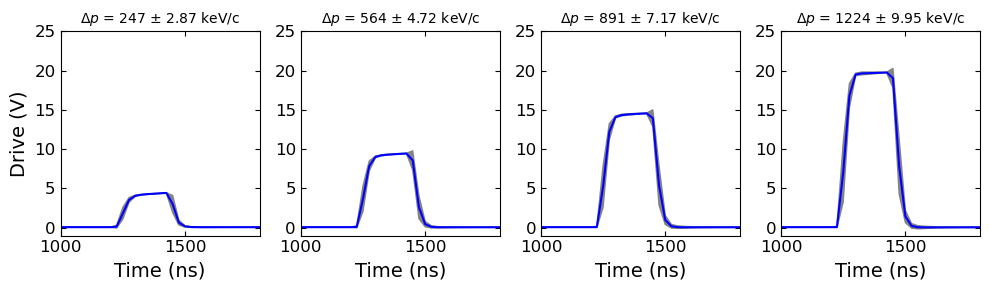

In [59]:
charge = 8

fig, axes = plt.subplots(1, 4, figsize=(10, 3))
tt = np.arange(start=0, stop=dt*(dds[0][0].size), step=dt)
for i in range(4):
    
    mean = np.mean(dds[i], axis=0)
    std = np.std(dds[i], axis=0)

    amp_kev = charge * np.mean(aas[i]) * 120 * 1.602e-19 * utils.SI2ev / 1000
    amp_kev_std = charge * np.std(aas[i]) * 120 * 1.602e-19 * utils.SI2ev / 1000
    
    axes[i].fill_between(tt*1e9, mean-std, mean+std, color='grey', alpha=0.95)
    axes[i].plot(tt*1e9, mean, color='blue')
    
    axes[i].set_title(f'$\Delta p$ = {int(amp_kev)} $\pm$ {amp_kev_std:.2f} keV/c', fontsize=10)

    axes[i].set_xlim(1000, 1800)
    axes[i].set_ylim(-1, 25)
    
    if i == 0:
        axes[i].set_ylabel('Drive (V)')

    axes[i].set_xlabel('Time (ns)')

fig.tight_layout()

In [70]:
folder = r'/Volumes/LaCie/pulse_calibration/20241125_8e'
datasets = ['20241125_dg_8e_200ns_5v', '20241125_dg_8e_200ns_10v', '20241125_dg_8e_200ns_15v', '20241125_dg_8e_200ns_20v']

pulseamps = np.asarray([247, 564, 891, 1224])

unnormalized_amps = utils.get_all_unnormalized_amps(folder, datasets, pulseamps, False)

20241125_dg_8e_200ns_5v
20241125_dg_8e_200ns_10v
20241125_dg_8e_200ns_15v
20241125_dg_8e_200ns_20v


(0.0, 2500.0)

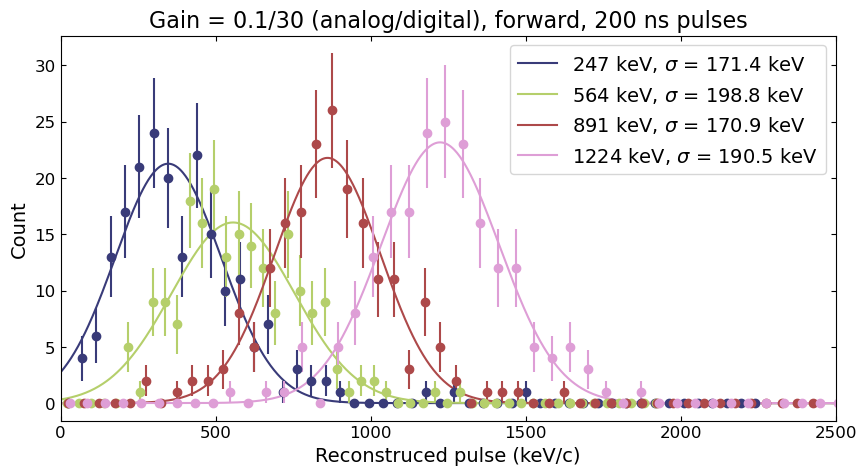

In [71]:
unnormalized_amps = [amps[~np.isnan(amps)] for amps in unnormalized_amps]
hhs, bcs, gps = utils.fit_amps_gaus(unnormalized_amps)

amp2kevs = [(pulseamps[i] / gps[i][1]) for i in range(len(pulseamps))]
amp2kev = np.mean(np.asarray(amp2kevs[-1:]))

normalized_amps = [amp * amp2kev for amp in unnormalized_amps]

fig, ax = utils.plot_gaus_fit(pulseamps, normalized_amps, hhs, bcs, gps, amp2kev=amp2kev, title='Gain = 0.1/30 (analog/digital), forward, 200 ns pulses')
ax.set_xlim(0, 2500)

In [72]:
amp2kev

7477.916199997697

/Users/yuhan/work/nanospheres/impulse_analysis/analysis_notebooks/../analysis_utils.py:681: RuntimeWarning: invalid value encountered in divide
  ax.plot(hists[0], hh_cut_all_sum / (hh_cut_all.shape[0] * scaling), '-', color=yale_colors[2], label='Detection quality + anti-coincidence cut', alpha=1)


(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (1.0 hours), begins 2024-11-22 14:44:38.149769'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

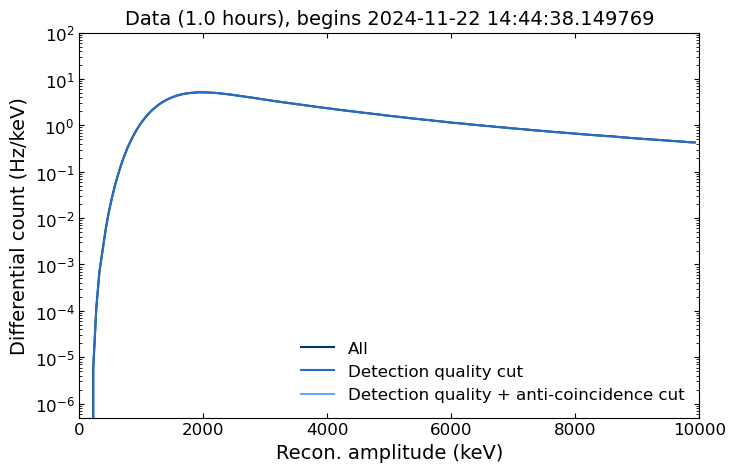

In [4]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241122_5e-5mbar'
data_prefix = r'20241122_abcd_5e-5mbar_'

hists_0 = utils.load_data_hists(data_dir, data_prefix, 60, 1600)

dataset = '20241122_5e-5mbar'
utils.plot_hist(dataset, data_prefix, 60, hists_0)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (1.0 hours), begins 2024-11-22 15:48:29.089194'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

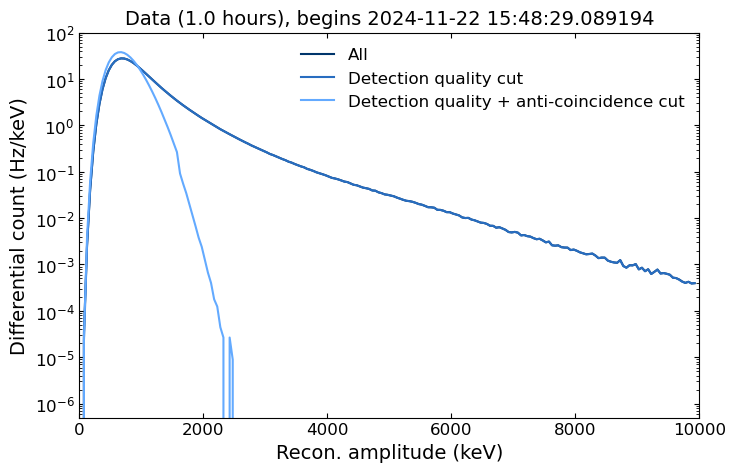

In [5]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241122_5e-6mbar'
data_prefix = r'20241122_abcd_5e-6mbar_'

hists_1 = utils.load_data_hists(data_dir, data_prefix, 60, 1600)

dataset = '20241122_5e-6mbar'
utils.plot_hist(dataset, data_prefix, 60, hists_1)

In [9]:
events_after_cut_1 = utils.get_events_after_cut(hists_1, thr=2400)
print('Number of windows with large events: ', len(events_after_cut_1))

Number of windows with large events:  4


/Volumes/LaCie/dm_data/20241122_5e-6mbar/20241122_abcd_5e-6mbar_5.hdf5
/Volumes/LaCie/dm_data/20241122_5e-6mbar/20241122_abcd_5e-6mbar_6.hdf5
/Volumes/LaCie/dm_data/20241122_5e-6mbar/20241122_abcd_5e-6mbar_14.hdf5
/Volumes/LaCie/dm_data/20241122_5e-6mbar/20241122_abcd_5e-6mbar_44.hdf5


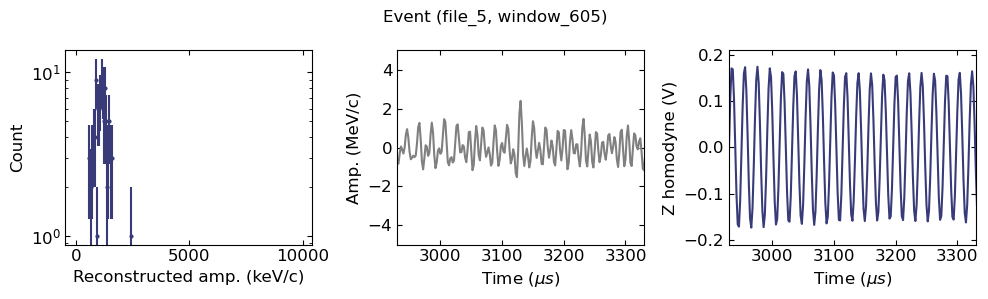

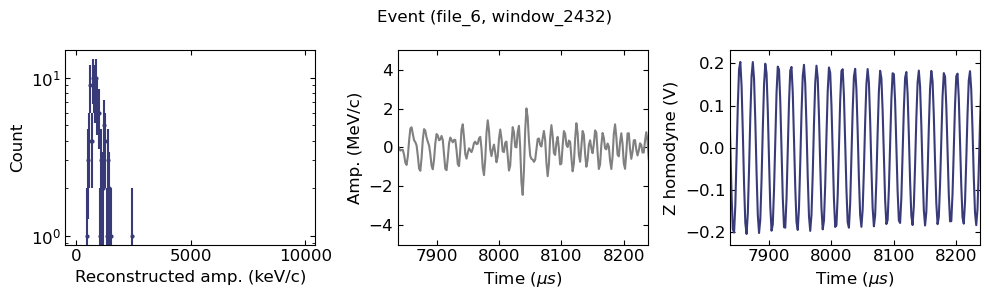

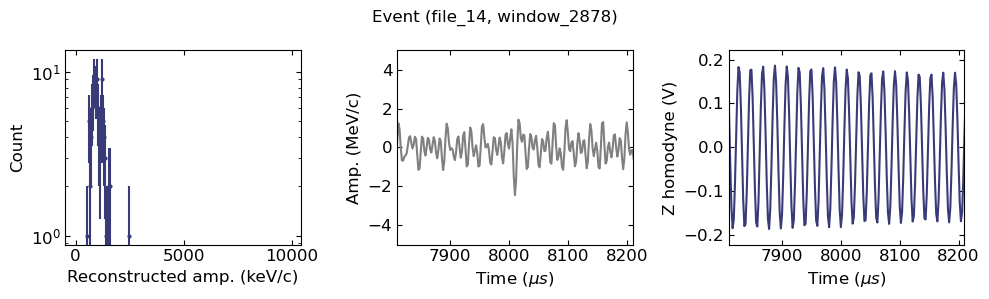

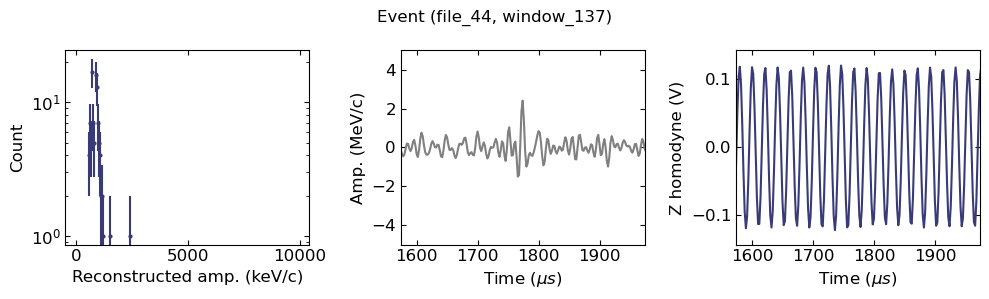

In [10]:
data_dir = r'/Volumes/LaCie/dm_data/20241122_5e-6mbar'
combined_path = os.path.join(data_dir, '*.hdf5')
data_files = glob.glob(combined_path)

c_mv = 5.522e-08
amp2kev = 7477.916199997697

window_length = 5000
bins = np.arange(0, 10000, 50)
bc = 0.5 * (bins[:-1] + bins[1:])

for i, j in events_after_cut_1[:10]:
    _, _, _, _, _, _ = utils.plot_hist_events(data_files, i, j, window_length, bins, bc, c_mv, amp2kev, False, True)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (1.0 hours), begins 2024-11-22 17:43:13.043916'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

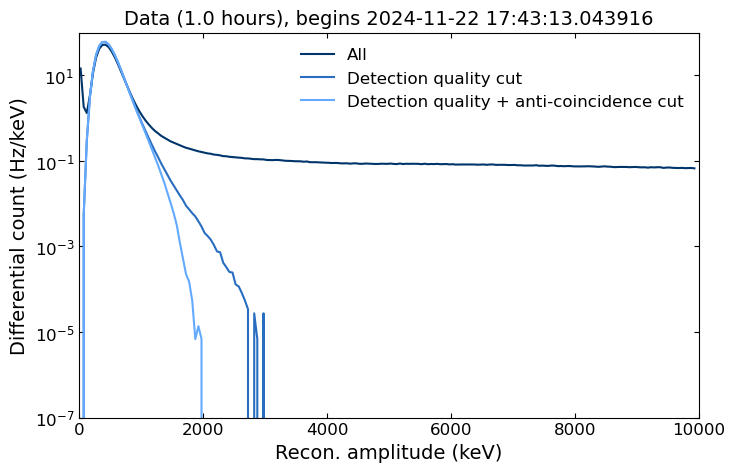

In [32]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241122_2e-7mbar'
data_prefix = r'20241122_abcd_2e-7mbar_'

hists_2 = utils.load_data_hists(data_dir, data_prefix, 60, 1600)

dataset = '20241122_2e-7mbar'
utils.plot_hist(dataset, data_prefix, 60, hists_2)

In [36]:
events_after_cut_2 = utils.get_events_after_cut(hists_2, thr=1900)
print('Number of windows with large events (> 1900 keV): ', len(events_after_cut_2))

Number of windows with large events (> 1900 keV):  3


/Volumes/LaCie/dm_data/20241122_2e-7mbar/20241122_abcd_2e-7mbar_6.hdf5
/Volumes/LaCie/dm_data/20241122_2e-7mbar/20241122_abcd_2e-7mbar_6.hdf5
/Volumes/LaCie/dm_data/20241122_2e-7mbar/20241122_abcd_2e-7mbar_12.hdf5


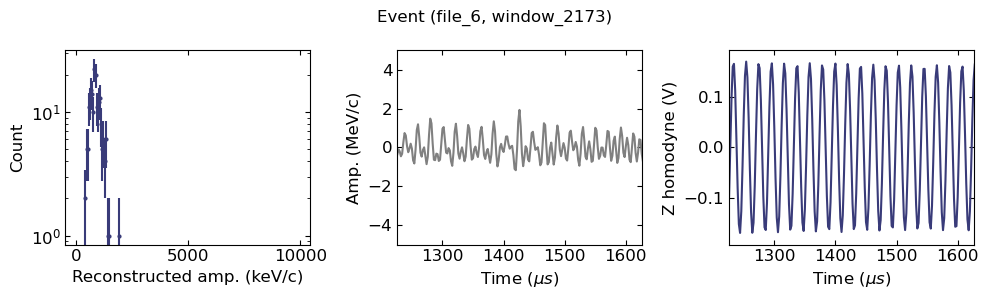

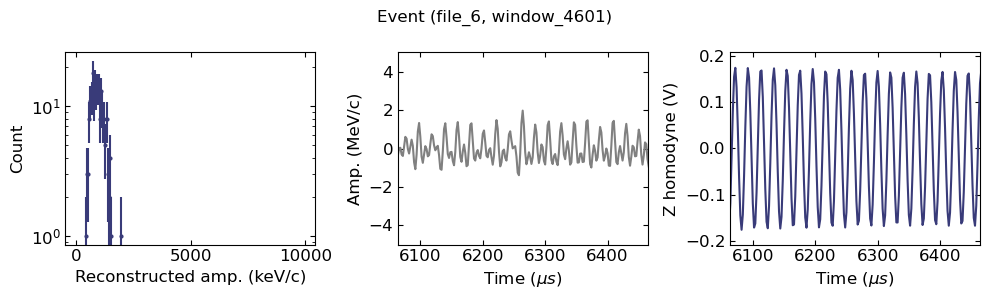

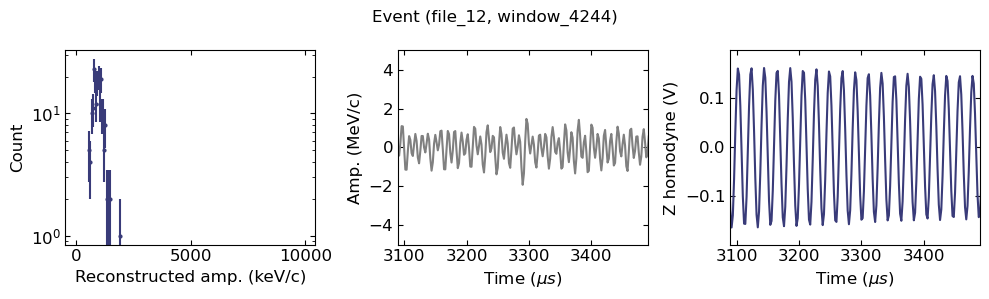

In [38]:
dataset = '20241122_2e-7mbar'
data_prefix = '20241122_abcd_2e-7mbar_'

for i, j in events_after_cut_2:
    _, _, _, _, _, _ = utils.plot_hist_events(dataset, data_prefix, i, j, window_length, bins, bc, c_mv, amp2kev, False, True)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (1.0 hours), begins 2024-11-23 09:24:15.722168'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

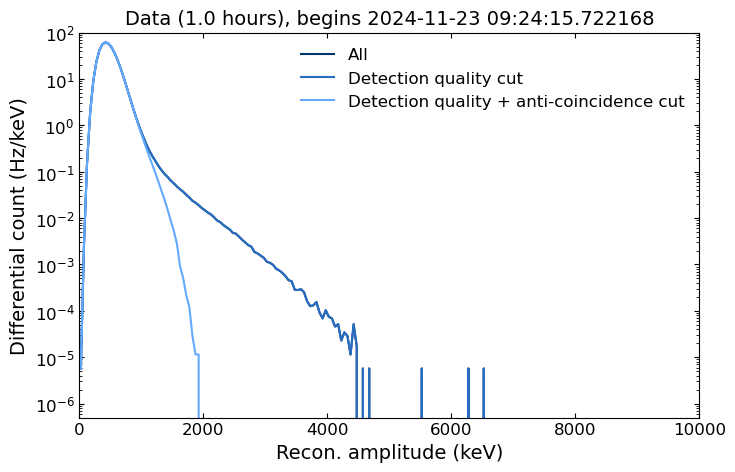

In [14]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241122_5e-8mbar'
data_prefix = r'20241122_abcd_5e-8mbar_'

hists_3 = utils.load_data_hists(data_dir, data_prefix, 60, 1600)

dataset = '20241122_5e-8mbar'
utils.plot_hist(dataset, data_prefix, 60, hists_3)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (1.0 hours), begins 2024-11-24 11:44:38.281536'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

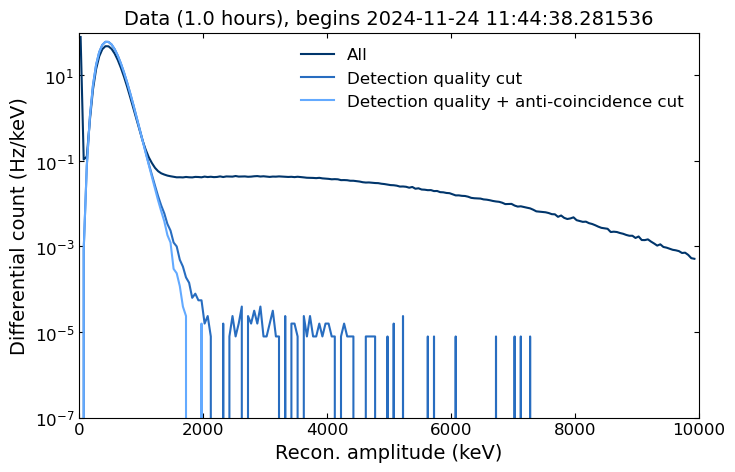

In [29]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241124_3e-8mbar'
data_prefix = r'20241124_abcd_3e-8mbar_'

hists_4 = utils.load_data_hists(data_dir, data_prefix, 60, 1500)

dataset = '20241124_3e-8mbar'
utils.plot_hist(dataset, data_prefix, 60, hists_4)

In [30]:
events_after_cut_4 = utils.get_events_after_cut(hists_4, thr=1900)
print('Number of windows with large events (> 2000 keV): ', len(events_after_cut_4))

Number of windows with large events (> 2000 keV):  2


/Volumes/LaCie/dm_data/20241124_3e-8mbar/20241124_abcd_3e-8mbar_33.hdf5
/Volumes/LaCie/dm_data/20241124_3e-8mbar/20241124_abcd_3e-8mbar_47.hdf5


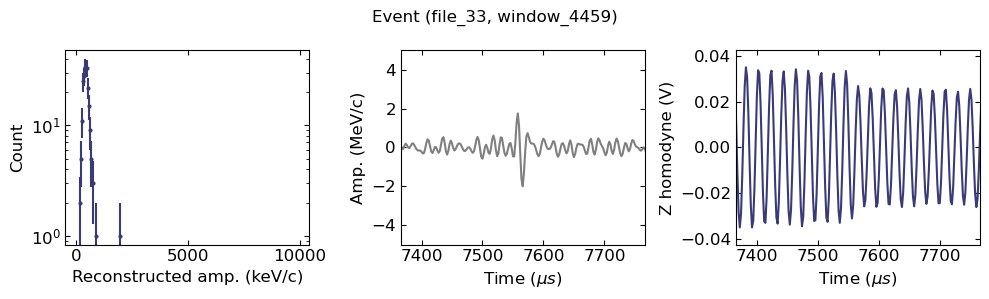

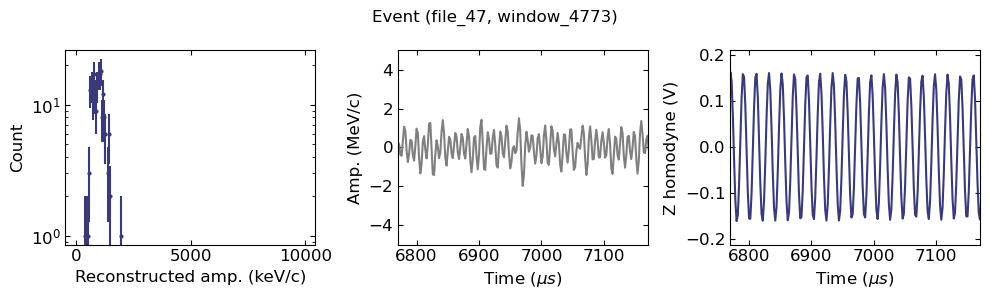

In [31]:
dataset = '20241124_3e-8mbar'
data_prefix = '20241124_abcd_3e-8mbar_'

for i, j in events_after_cut_4:
    _, _, _, _, _, _ = utils.plot_hist_events(dataset, data_prefix, i, j, window_length, bins, bc, c_mv, amp2kev, False, True)

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (1.0 hours), begins 2024-11-24 21:54:01.617479'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

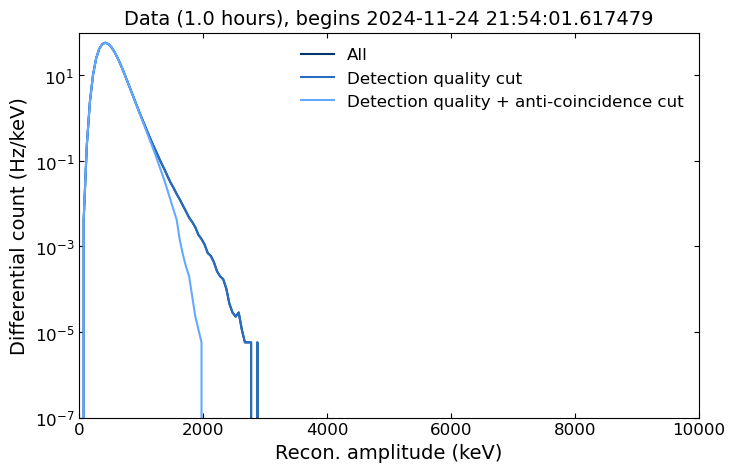

In [107]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241124_2_7e-8mbar'
data_prefix = r'20241124_abcd_2_7e-8mbar_'

hists_5 = utils.load_data_hists(data_dir, data_prefix, 60, 1600)

dataset = '20241124_2_7e-8mbar'
utils.plot_hist(dataset, data_prefix, 60, hists_5)

## Long data with turbo only

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (12.0 hours), begins 2024-11-25 18:29:07.316856'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

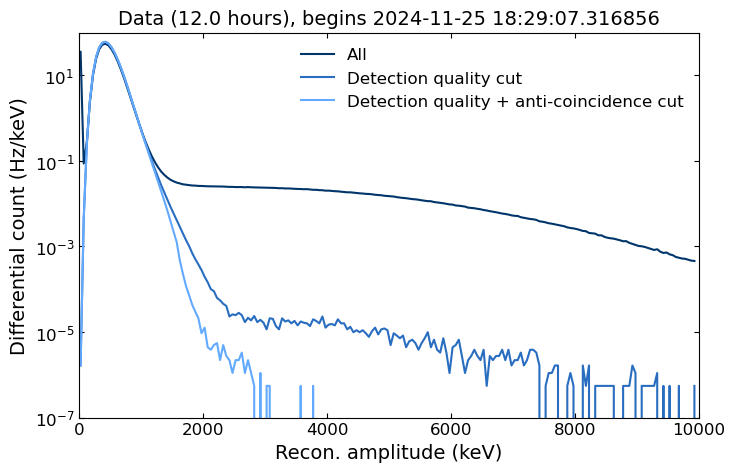

In [19]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241125_2_4e-8mbar_turbo_long'
data_prefix = r'20241125_abcd__'

hists_6 = utils.load_data_hists(data_dir, data_prefix, 720, 1600)

dataset = '20241125_2_4e-8mbar_turbo_long'
utils.plot_hist(dataset, data_prefix, 720, hists_6)

In [20]:
events_after_cut_6 = utils.get_events_after_cut(hists_6, thr=5000)
print('Number of windows with large events: ', len(events_after_cut_6))

Number of windows with large events:  0


/Volumes/LaCie/dm_data/20241125_2_4e-8mbar_turbo_long/20241125_abcd__372.hdf5


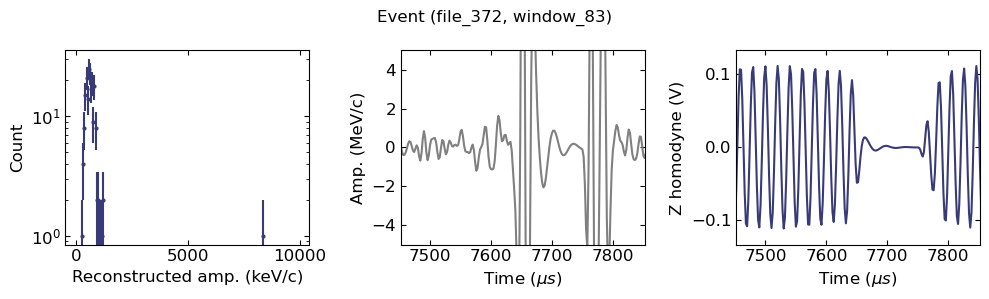

In [15]:
c_mv = 5.522e-08
amp2kev = 7477.916199997697

window_length = 5000
bins = np.arange(0, 10000, 50)
bc = 0.5 * (bins[:-1] + bins[1:])

for i, j in events_after_cut_6:
    # print(i, j)
    amp_lp, hh, zz, zz_bp, _, _ = utils.plot_hist_events('20241125_2_4e-8mbar_turbo_long', '20241125_abcd__', i, j, window_length, bins, bc, c_mv, amp2kev, False, True)

## Long data with turbo and NEG

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Data (3.9 hours), begins 2024-11-26 10:02:12.744044'}, xlabel='Recon. amplitude (keV)', ylabel='Differential count (Hz/keV)'>)

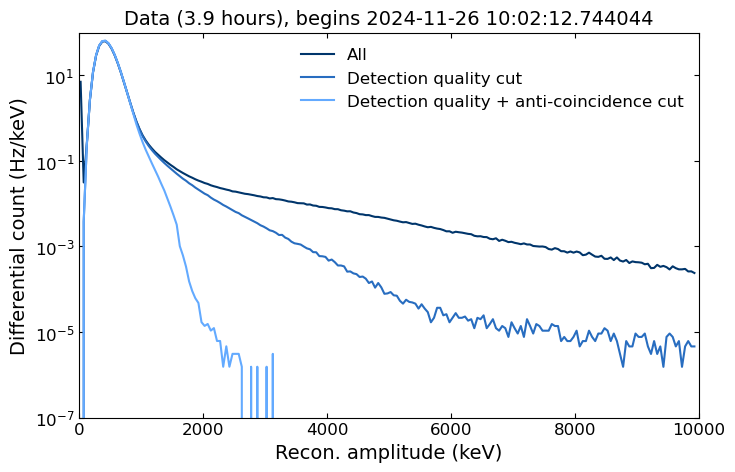

In [109]:
data_dir = r'/Users/yuhan/work/nanospheres/data/dm_data_processed/20241126_1_5e-8mbar_turbo_neg_long'
data_prefix = r'20241126_abcd_'

hists_7 = utils.load_data_hists(data_dir, data_prefix, 232, 1600)

dataset = '20241126_1_5e-8mbar_turbo_neg_long'
utils.plot_hist(dataset, data_prefix, 232, hists_7)

In [104]:
events_after_cut_6 = utils.get_events_after_cut(hists_6, thr=2000)
print('Number of windows with large events (> 2000 keV): ', len(events_after_cut_6))

Number of windows with large events (> 2000 keV):  59


/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_170.hdf5
/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_173.hdf5
/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_175.hdf5
/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_175.hdf5
/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_175.hdf5
/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_179.hdf5
/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_180.hdf5
/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_180.hdf5
/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_185.hdf5
/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_196.hdf5


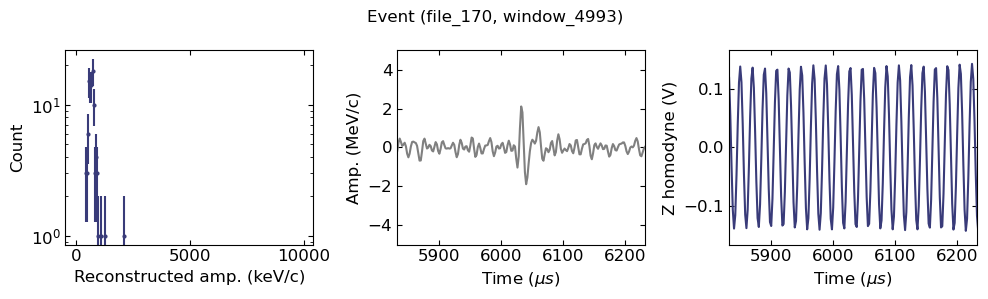

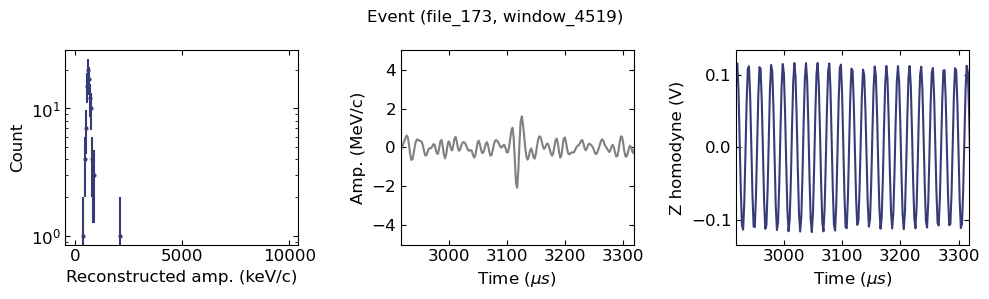

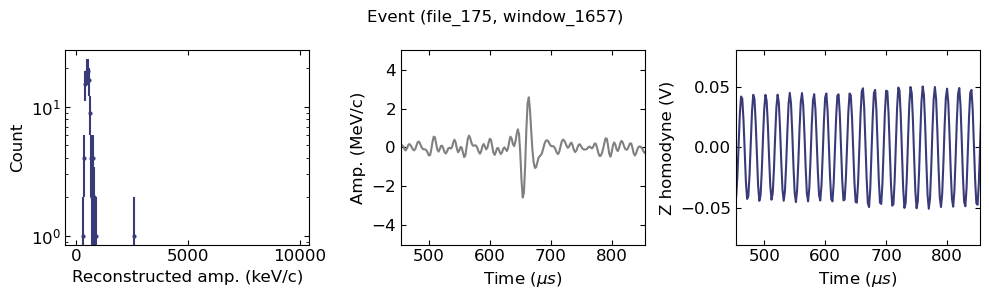

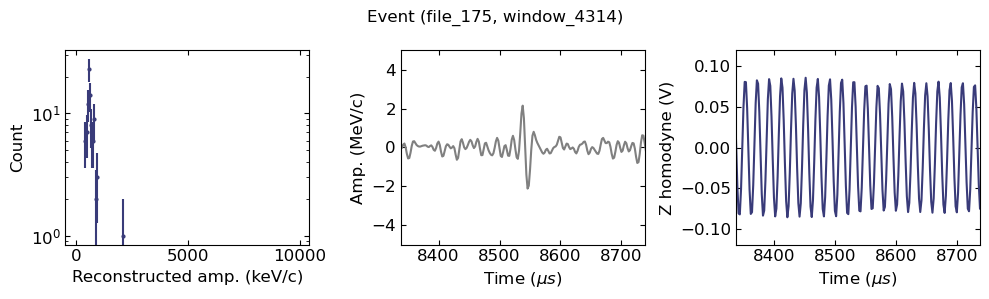

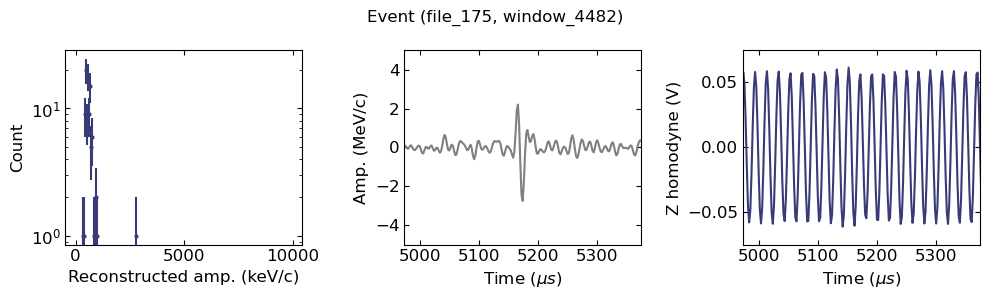

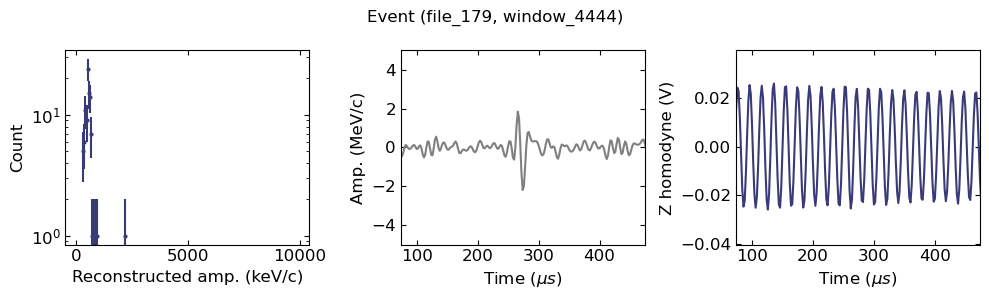

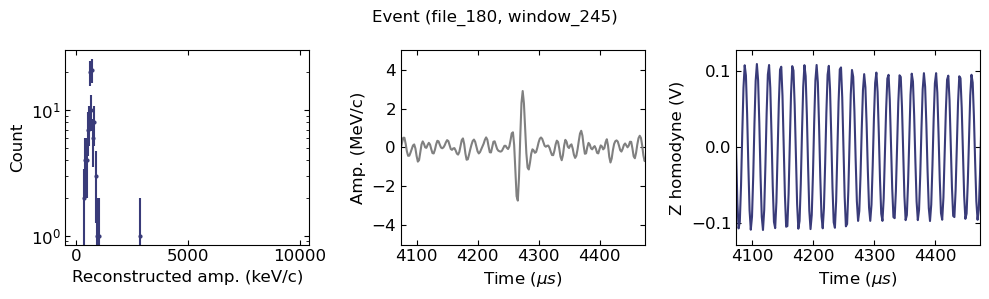

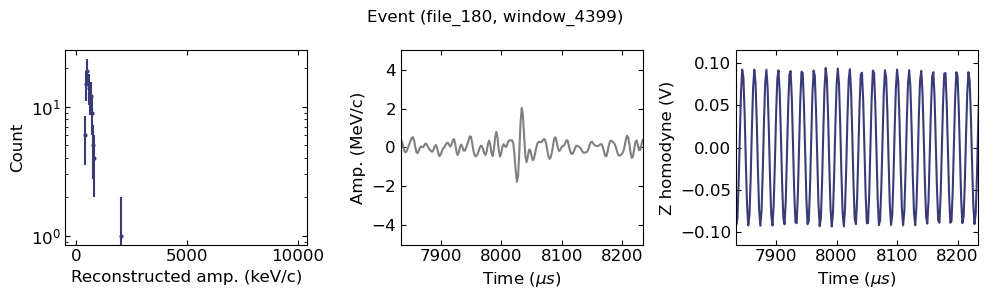

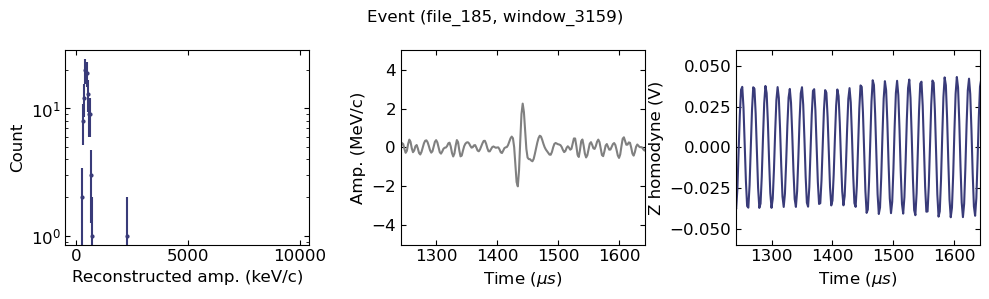

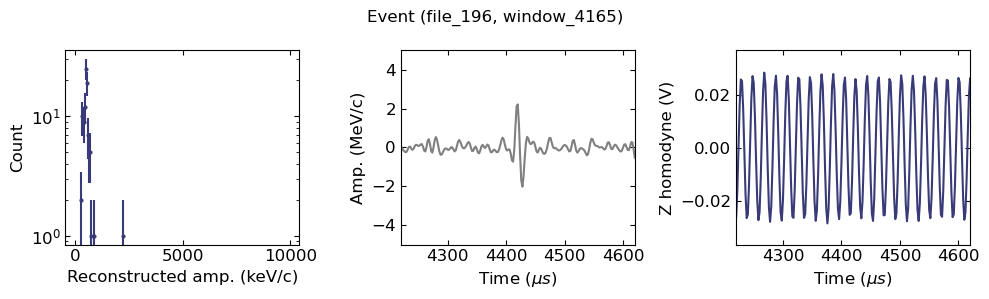

In [57]:
dataset = '20241126_1_5e-8mbar_turbo_neg_long'
data_prefix = r'20241126_abcd_'

for i, j in events_after_cut_6[-10:]:
    _, _, _, _, _, _ = utils.plot_hist_events(dataset, data_prefix, i, j, window_length, bins, bc, c_mv, amp2kev, False, True)

In [116]:
bc, hhs, hh_cut_det, hh_cut_all, good_dets, no_excess_events = hists_6
good_dets[372, 83] = False
hh_6_picked = hhs[np.logical_and(good_dets, no_excess_events)]

Text(0, 0.5, 'Differential count (Hz/keV)')

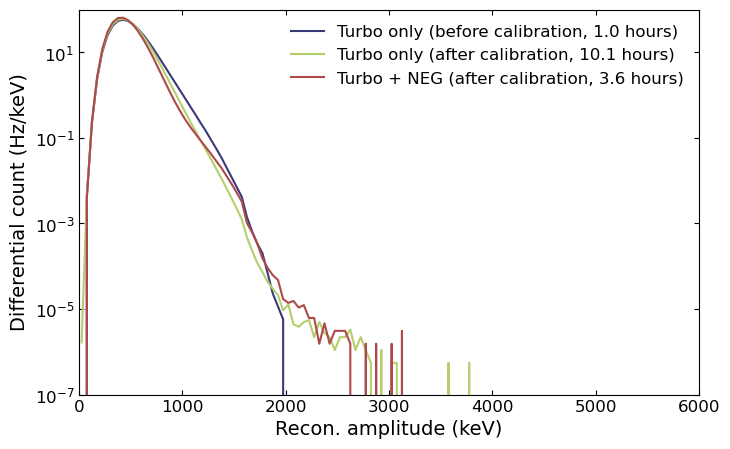

In [123]:
colors = plt.colormaps.get_cmap('tab20b').resampled(4).colors
fig, ax = plt.subplots(figsize=(8, 5))

n_search_per_win = (5000 - 150) / 25
time_per_search = 2e-6 * 25
scaling_5 = n_search_per_win * time_per_search * (hists_5[0][1] - hists_5[0][0])
scaling_6 = n_search_per_win * time_per_search * (hists_6[0][1] - hists_5[0][0])
scaling_7 = n_search_per_win * time_per_search * (hists_7[0][1] - hists_6[0][0])

time_5 = hists_5[3].shape[0] * n_search_per_win * time_per_search / 3600
time_6 = hh_6_picked.shape[0] * n_search_per_win * time_per_search / 3600
time_7 = hists_7[3].shape[0] * n_search_per_win * time_per_search / 3600

ax.plot(hists_5[0], np.sum(hists_5[3], axis=0) / (hists_5[3].shape[0] * scaling_5), '-', color=colors[0], label=f'Turbo only (before calibration, {time_5:.1f} hours)', alpha=1)
ax.plot(hists_6[0], np.sum(hh_6_picked, axis=0) / (hh_6_picked.shape[0] * scaling_6), '-', color=colors[1], label=f'Turbo only (after calibration, {time_6:.1f} hours)', alpha=1)
ax.plot(hists_7[0], np.sum(hists_7[3], axis=0) / (hists_7[3].shape[0] * scaling_7), '-', color=colors[2], label=f'Turbo + NEG (after calibration, {time_7:.1f} hours)', alpha=1)

ax.legend(frameon=False, fontsize=12)

ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_xlim(0, 6000)
ax.set_ylim(1e-7, 100)

ax.set_xlabel('Recon. amplitude (keV)')
ax.set_ylabel('Differential count (Hz/keV)')

In [85]:
file = '/Volumes/LaCie/dm_data/20241126_1_5e-8mbar_turbo_neg_long/20241126_abcd_233.hdf5'
f = h5py.File(file, "r")

xx = f['data']['channel_a'][:] * f['data']['channel_a'].attrs['adc2mv'] / 1e3
yy = f['data']['channel_b'][:] * f['data']['channel_b'].attrs['adc2mv'] / 1e3
zz_f = f['data']['channel_c'][:] * f['data']['channel_c'].attrs['adc2mv'] / 1e3
zz = f['data']['channel_d'][:] * f['data']['channel_d'].attrs['adc2mv'] / 1e3

(12702700.0, 12702800.0)

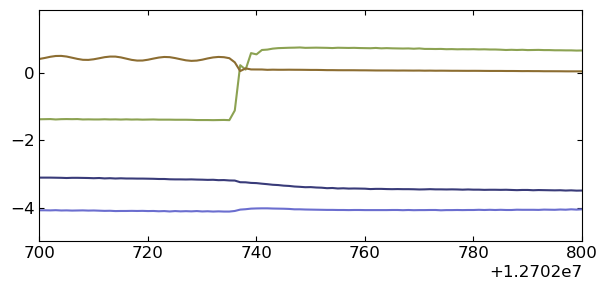

In [102]:
plt.plot(xx)
plt.plot(yy)
plt.plot(zz_f)
plt.plot(zz)

plt.xlim(1.27027e7, 1.27028e7)
